Revisão dos Dados

In [3]:
import pandas as pd

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';', encoding='utf-8')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   risp                      19 non-null     int64  
 1   total_crimes              19 non-null     int64  
 2   latitude                  19 non-null     float64
 3   longitude                 19 non-null     float64
 4   populacao                 19 non-null     int64  
 5   renda_media               19 non-null     float64
 6   idh_medio                 19 non-null     float64
 7   taxa_de_analfabetismo(%)  19 non-null     float64
 8   esperança_vida            19 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 1.5 KB
None


,risp,total_crimes,latitude,longitude,populacao,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida
0,1,156,-19.9167,-43.9345,2315560,3341.200,0.810,2.220,76.370
1,2,2808,-19.7668,-44.0868,1905395,1305.202,0.695,3.881,75.297
2,3,2808,-19.6944,-43.9237,988106,1495.460,0.715,3.599,75.464
3,4,13416,-21.7642,-43.3496,1574197,1150.620,0.673,4.880,74.831
4,5,4680,-19.7479,-47.9319,823093,1603.200,0.712,4.643,76.479


Estatísticas Descritivas

In [4]:
import pandas as pd

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';', encoding='utf-8')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
risp,19.0,1.000000e+01,5.627314,1.0000,5.5000,10.0000,1.450000e+01,1.900000e+01
total_crimes,19.0,7.003579e+03,4259.525252,156.0000,2808.0000,7800.0000,9.438000e+03,1.513200e+04
latitude,19.0,-1.962876e+01,1.600327,-22.2300,-20.6851,-19.6944,-1.888365e+01,-1.635950e+01
longitude,19.0,-4.470571e+01,1.879590,-48.2755,-46.1271,-44.2469,-4.381575e+01,-4.150590e+01
populacao,19.0,1.068967e+06,517493.594817,377579.0000,710346.0000,988106.0000,1.305146e+06,2.315560e+06
renda_media,19.0,1.289073e+03,569.881286,663.0300,1004.0015,1238.8800,1.454088e+03,3.341200e+03
idh_medio,19.0,6.851053e-01,0.044920,0.6070,0.6625,0.6950,7.070000e-01,8.100000e-01
taxa_de_analfabetismo(%),19.0,6.281000e+00,3.417590,2.2200,4.1725,5.1570,6.949000e+00,1.603300e+01
esperança_vida,19.0,7.479705e+01,1.209942,72.4720,74.0535,75.2850,7.563800e+01,7.647900e+01


Correlação entre variáveis

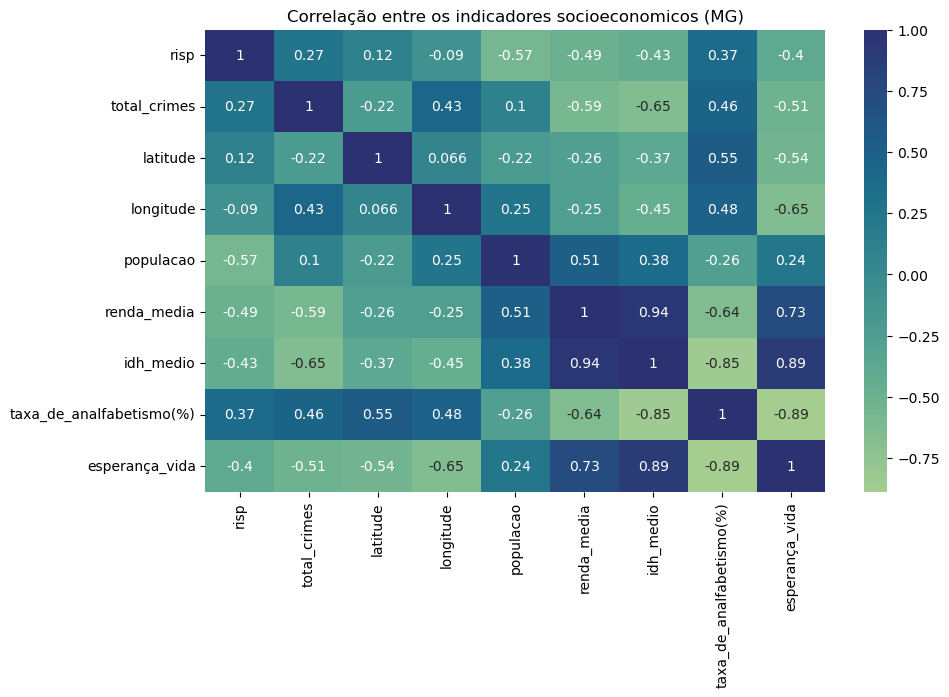

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';', encoding='utf-8')

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='crest')
plt.title("Correlação entre os indicadores socioeconomicos (MG)")
plt.show()

O gráfico exibe a correlação entre todas as variáveis numéricas do seu dataset, ou seja, como uma variável se relaciona com outra.

Insights importantes que são possiveis de se tirar:

-> Quando o **IHD (Índice de Desenvolvimento Humano)** aumenta, o **número de crimes violentos** diminui, a **renda média** é maior, a **taxa de analfabetismo** é menor e a **esperança de vida é maior**.

-> O número de crimes violentos em uma região é um indicador de outros problemas, uma vez que, quando ele aumenta, o **IDH** diminui, a **renda média** da região diminui, a **esperança de vida** diminui e a **taxa de analfabetismo** aumenta  



Criação de um mapa de calor com numero de crimes por região

In [17]:
import folium
from folium.plugins import HeatMap

df = pd.read_csv('../data/processado/crimes_por_regiao.csv', sep=';')

mapa = folium.Map(location= [-18.472096, -44.353396], zoom_start= 6)
coords = list(zip(df.latitude, df.longitude))
mapaCalor = HeatMap(coords, radius=60, blur=50)
mapa.add_child(mapaCalor)

mapa 

mapa.save('../src/mapa_calor_crimes_MG.html')

| Cor             | Critério                                              | Interpretação                                                                                                              |
| --------------- | ----------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| 🔴 **Vermelho** | RISP com **maior número de crimes**  | Regiões **mais críticas**, onde há **maior incidência criminal** e, possivelmente, **piores indicadores socioeconômicos**. |
| 🔵 **Azul**    | RISP com **menor número de crimes** | Regiões **mais estáveis ou seguras**, geralmente com **melhores índices de renda, IDH e educação**.                        |


Mapa de calor das regiões mais críticas

In [16]:
import folium

m = folium.Map(location=[-18.5, -44.5], zoom_start=6)
df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=f"RISP {row['risp']}<br>Crimes: {row['total_crimes']}<br>IDH: {row['idh_medio']}",
        color='red' if row['total_crimes'] > df['total_crimes'].mean() else 'green',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m

m.save('../src/mapa_criminalidade_risp.html')


| Cor             | Critério                                              | Interpretação                                                                                                              |
| --------------- | ----------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| 🔴 **Vermelho** | RISP com **total de crimes acima da média estadual**  | Regiões **mais críticas**, onde há **maior incidência criminal** e, possivelmente, **piores indicadores socioeconômicos**. |
| 🟢 **Verde**    | RISP com **total de crimes abaixo da média estadual** | Regiões **mais estáveis ou seguras**, geralmente com **melhores índices de renda, IDH e educação**.                        |


Identificação dos principais agentes de impacto sobe o número de crimes violentos

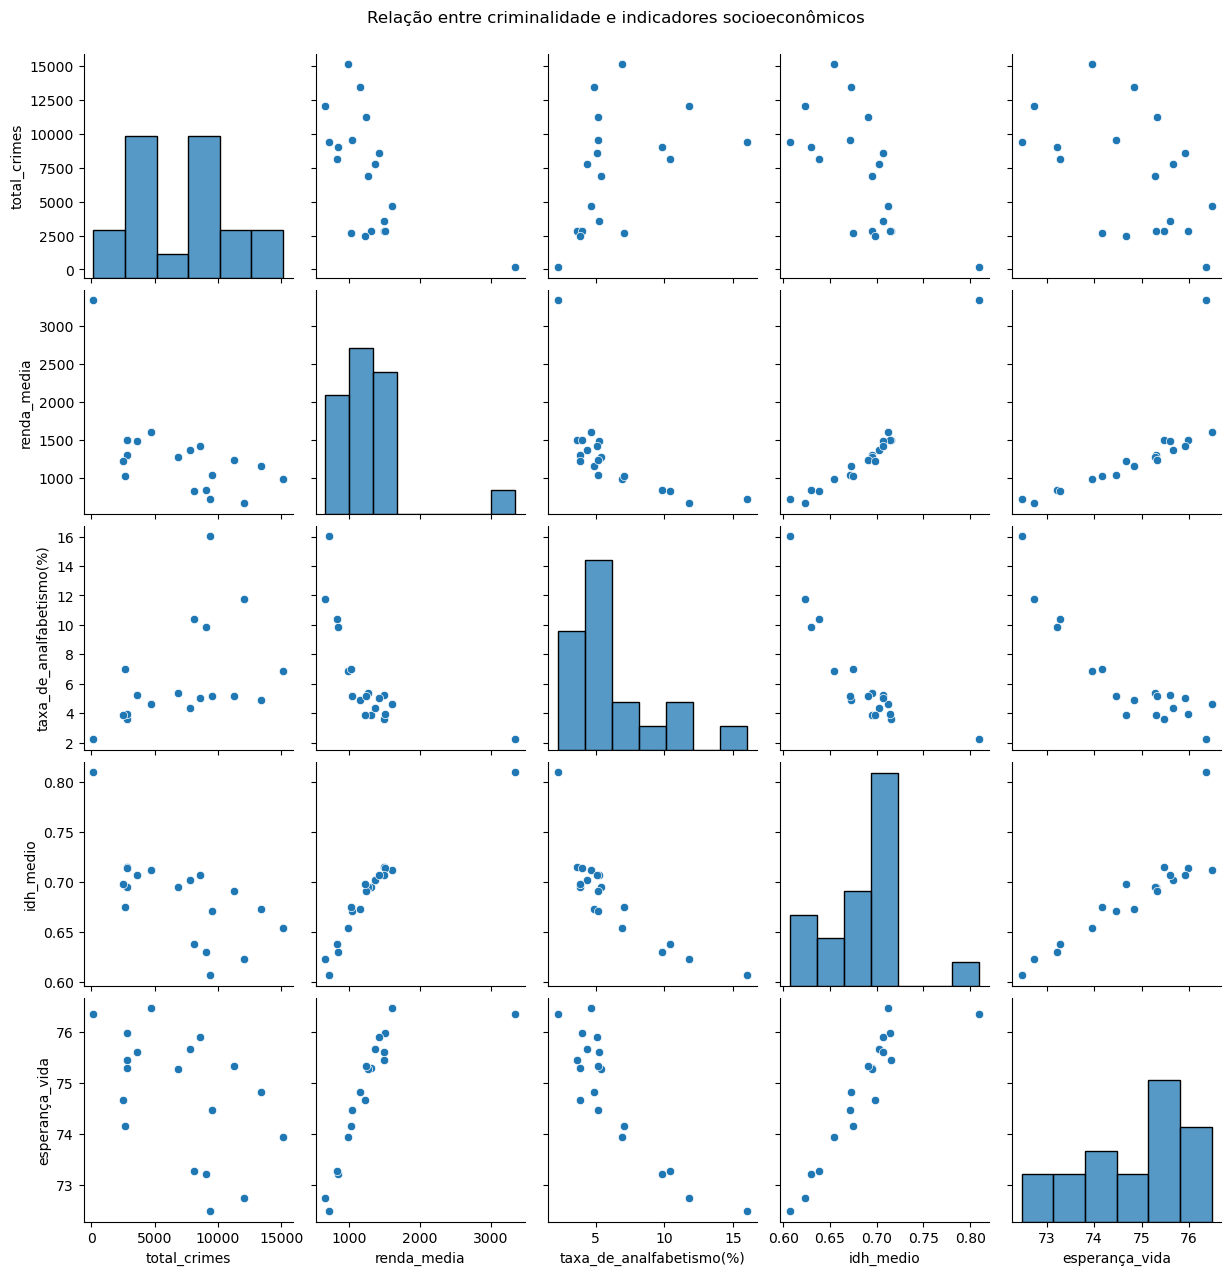

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

sns.pairplot(df, vars=['total_crimes', 'renda_media', 'taxa_de_analfabetismo(%)', 'idh_medio', 'esperança_vida'])
plt.suptitle('Relação entre criminalidade e indicadores socioeconômicos', y=1.02)
plt.show()


O gráfico de dispersão múltipla (pairplot) mostra como variáveis como renda média, taxa de analfabetismo, IDH e esperança de vida se relacionam com o número total de crimes em cada RISP.

Cada ponto representa uma região (RISP), e a disposição dos pontos permite observar tendências. Se o aumento ou redução de um fator está associado ao aumento ou redução da criminalidade.

| Comparação                                  | Tendência visual                     | Interpretação                                                                                                                                                                                                                                                |
| ------------------------------------------- | ------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **total_crimes × renda_media**              | Tendência **decrescente**            | RISPs com **maior renda média** tendem a registrar **menos crimes**. A renda atua como fator de proteção social, reduzindo a vulnerabilidade e o envolvimento com atividades ilícitas.                                                                       |
| **total_crimes × taxa_de_analfabetismo(%)** | Tendência **crescente**              | À medida que o **analfabetismo aumenta**, o número de crimes também cresce. Isso indica que a **baixa escolaridade** está associada a **maior incidência criminal**, possivelmente por limitar o acesso ao mercado de trabalho e aumentar a exclusão social. |
| **total_crimes × idh_medio**                | Tendência **fortemente decrescente** | O **IDH** tem uma das **relações mais negativas** com a criminalidade. Regiões com **melhor educação, renda e saúde** apresentam **menores índices de crimes**, reforçando a influência do desenvolvimento humano sobre a segurança pública.                 |
| **total_crimes × esperança_vida**           | Tendência **levemente decrescente**  | Regiões com **maior expectativa de vida** costumam ter **menos crimes**, o que sugere que **melhores condições de vida** e **acesso à saúde** também estão associadas a ambientes mais seguros.                                                              |


Com isso é possivel concluir que **Educação e Renda** são os **principais fatores** de impacto sobre a criminalidade nas RISPs.

O **IDH** e a **renda média** mostram correlações negativas fortes, ou seja, **quanto mais desenvolvida é a região, menor a incidência criminal.**

**Esperança de vida reforça o padrão**: melhor qualidade de vida → menor criminalidade.

Identificação dos principais agentes de impacto sobre o IDH

C:\Users\Meu computador\AppData\Local\Temp\ipykernel_10048\913881963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_idh.values, y=corr_idh.index, palette='crest')


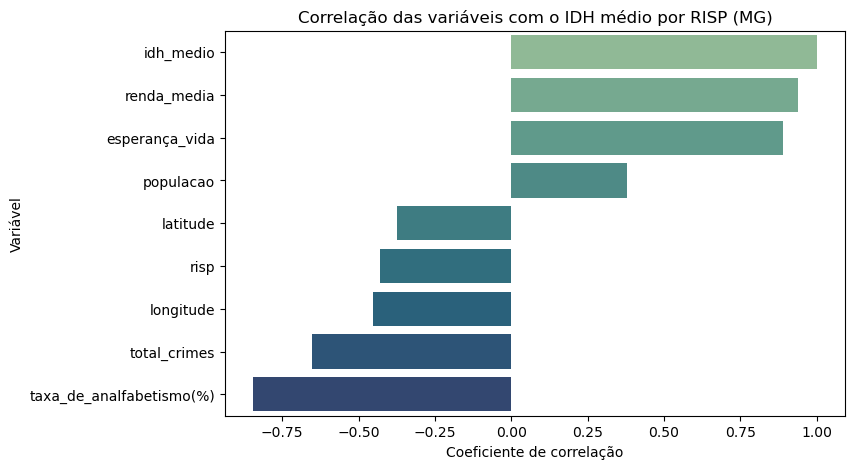

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

corr_idh = df.corr(numeric_only=True)['idh_medio'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_idh.values, y=corr_idh.index, palette='crest')
plt.title('Correlação das variáveis com o IDH médio por RISP (MG)')
plt.xlabel('Coeficiente de correlação')
plt.ylabel('Variável')
plt.show()


Valores próximos de +1 = aumentam junto com o IDH (ex: renda, esperança de vida).

Valores próximos de –1 = diminuem quando o IDH aumenta (ex: analfabetismo, crimes).

Relações Diretas dos indicadores socioeconômicos com o IDH

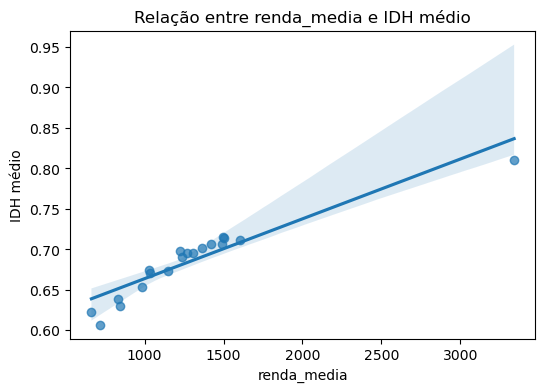

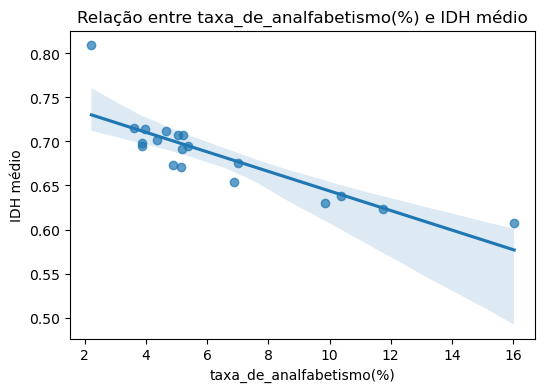

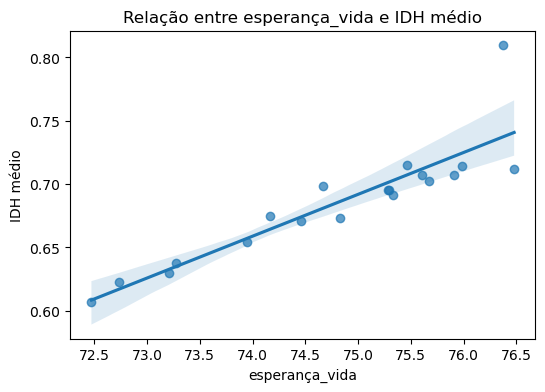

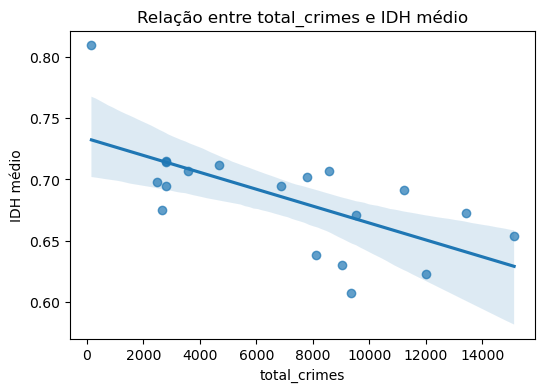

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processado/database_rispMG.csv', sep=';')

variaveis = ['renda_media', 'taxa_de_analfabetismo(%)', 'esperança_vida', 'total_crimes']

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.regplot(x=var, y='idh_medio', data=df, scatter_kws={'alpha':0.7})
    plt.title(f'Relação entre {var} e IDH médio')
    plt.ylabel('IDH médio')
    plt.show()

Renda média = tendência crescente: quanto maior a renda, maior o IDH.

Taxa de analfabetismo = tendência decrescente: regiões com mais analfabetismo têm menor IDH.

Esperança de vida = tendência fortemente crescente.

Total de crimes = tendência levemente decrescente, indicando que maior IDH tende a estar ligado a menor criminalidade.